# About Dataset

This unique dataset, collected via a May 2025 survey, captures how 496 Indian college students use AI tools (e.g., ChatGPT, Gemini, Copilot) in academics. 
It includes 16 attributes like AI tool usage, trust, impact on grades, and internet access, ideal for education analytics and machine learning.

**Columns:**

**Student_Name**: Anonymized student name.

**College_Name**: College attended.

**Stream**: Academic discipline (e.g., Engineering, Arts).

**Year_of_Study**: Year of study (1–4).

**AI_Tools_Used**: Tools used (e.g., ChatGPT, Gemini).

**Daily_Usage_Hours**: Hours spent daily on AI tools.

**Use_Cases**: Purposes (e.g., Assignments, Exam Prep).

**Trust_in_AI_Tools**: Trust level (1–5).

**Impact_on_Grades**: Grade impact (-3 to +3).

**Do_Professors_Allow_Use**: Professor approval (Yes/No).

**Preferred_AI_Tool**: Preferred tool.

**Awareness_Level**: AI awareness (1–10).

**Willing_to_Pay_for_Access**: Willingness to pay (Yes/No).

**State**: Indian state.

**Device_Used**: Device (e.g., Laptop, Mobile).

**Internet_Access**: Access quality (Poor/Medium/High).

# About Project

The current project focuses on exploratory analysis, diving into insights from our survey on AI tool usage. We examined how participants across academic years, awareness levels, and regions interact with various AI technologies. This brief analysis highlights usage volumes, device preferences, trust levels, and demographic patterns—leveraging tables, stacked bar charts, and heatmaps to surface emerging trends.

This overview lays the groundwork for additional analyses that will provide deeper insights using other features covered in the survey.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# This will ignore all warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-tool-usage-by-indian-college-students-2025/Students.csv


# Importing Dataset

In [2]:
survey_df = pd.read_csv('../input/ai-tool-usage-by-indian-college-students-2025/Students.csv')

# Dataset Overview (structure)
print("Survey Dataset Info:")
survey_df.info()

print(f"\nSurvey Dataset Shape: {survey_df.shape}")

Survey Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3614 entries, 0 to 3613
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Student_Name               3614 non-null   object 
 1   College_Name               3614 non-null   object 
 2   Stream                     3614 non-null   object 
 3   Year_of_Study              3614 non-null   int64  
 4   AI_Tools_Used              3614 non-null   object 
 5   Daily_Usage_Hours          3614 non-null   float64
 6   Use_Cases                  3614 non-null   object 
 7   Trust_in_AI_Tools          3614 non-null   int64  
 8   Impact_on_Grades           3614 non-null   int64  
 9   Do_Professors_Allow_Use    3614 non-null   object 
 10  Preferred_AI_Tool          3614 non-null   object 
 11  Awareness_Level            3614 non-null   int64  
 12  Willing_to_Pay_for_Access  3614 non-null   object 
 13  State                      

In [3]:
# Dataset Overview (content)
print(f"Survey Dataset Head: {survey_df.head(7)}")

Survey Dataset Head:   Student_Name                                      College_Name       Stream  \
0        Aarav       Indian Institute of Information Technology   Engineering   
1       Vivaan   Government Ram Bhajan Rai NES College, Jashpur      Commerce   
2       Aditya     Dolphin PG Institute of BioMedical & Natural       Science   
3       Vihaan  Shaheed Rajguru College of Applied Sciences for          Arts   
4        Arjun                   Roorkee College of Engineering       Science   
5          Sai                              Kanya Mahavidyalaya      Commerce   
6      Reyansh     Shivalik Institute of Paramedical Technology       Medical   

   Year_of_Study             AI_Tools_Used  Daily_Usage_Hours  \
0              4                    Gemini                0.9   
1              2                   ChatGPT                3.4   
2              2                   Copilot                3.6   
3              2                   Copilot                2.9   
4    

# List Unique Values for Selected Features

In [4]:
# Display feature (column) names of the DataFrame
print(survey_df.columns.tolist())

['Student_Name', 'College_Name', 'Stream', 'Year_of_Study', 'AI_Tools_Used', 'Daily_Usage_Hours', 'Use_Cases', 'Trust_in_AI_Tools', 'Impact_on_Grades', 'Do_Professors_Allow_Use', 'Preferred_AI_Tool', 'Awareness_Level', 'Willing_to_Pay_for_Access', 'State', 'Device_Used', 'Internet_Access']


In [5]:
# List of selected features you want to inspect
selected_features = ['College_Name', 'Stream', 'Year_of_Study', 'AI_Tools_Used', 'Daily_Usage_Hours', 'Trust_in_AI_Tools', 'Impact_on_Grades', 'Do_Professors_Allow_Use', 
                     'Preferred_AI_Tool', 'Awareness_Level', 'Willing_to_Pay_for_Access', 'State', 'Device_Used', 'Internet_Access']

# Display unique values for each selected feature
for feature in selected_features:
    unique_vals = survey_df[feature].unique()
    print(f"\nUnique values for '{feature}':")
    print(unique_vals)


Unique values for 'College_Name':
['Indian Institute of Information Technology '
 'Government Ram Bhajan Rai NES College, Jashpur '
 'Dolphin PG Institute of BioMedical & Natural ' ...
 'National Research Centre on Mithun '
 'Himalayan Pharmacy Institute, East Sikkim '
 'Baba Saheb Bhimrao Ambedkar Law College ']

Unique values for 'Stream':
['Engineering' 'Commerce' 'Science' 'Arts' 'Medical' 'Management' 'Law'
 'Pharmacy' 'Agriculture' 'Hotel-management']

Unique values for 'Year_of_Study':
[4 2 1 3]

Unique values for 'AI_Tools_Used':
['Gemini' 'ChatGPT' 'Copilot' 'ChatGPT, Gemini, Copilot'
 'ChatGPT, Copilot' 'Gemini, Midjourney' 'Other' 'Bard' 'Claude']

Unique values for 'Daily_Usage_Hours':
[0.9 3.4 3.6 2.9 0.8 2.2 2.4 2.1 1.4 1.  1.2 4.4 4.1 4.3 2.5 3.2 3.7 3.8
 4.2 1.6 3.1 0.5 1.8 0.7 2.6 1.1 0.6 2.7 1.9 3.9 1.7 1.3 2.  1.5 3.3 3.
 2.3 4.5 3.5 2.8 4.  4.9 4.8 4.7 4.6 5. ]

Unique values for 'Trust_in_AI_Tools':
[2 3 5 1 4]

Unique values for 'Impact_on_Grades':
[ 2 -3  0  3 -

# EDA

## AI Tool Usage Volumes

In [6]:
# Group by and compute AI usage to tools for both sum and count
usage_agg = (
    survey_df
    .groupby(['Preferred_AI_Tool', 'Device_Used'])['Daily_Usage_Hours']
    .agg(['sum', 'count'])
    .reset_index()
)

# Rename columns for clarity
usage_agg.rename(columns={'sum': 'Total_Usage_Hours', 'count': 'Response_Count'}, inplace=True)

# Create pivot tables for each metric
usage_pivot = usage_agg.pivot(index='Preferred_AI_Tool', columns='Device_Used', values='Total_Usage_Hours').fillna(0).round(1)
count_pivot = usage_agg.pivot(index='Preferred_AI_Tool', columns='Device_Used', values='Response_Count').fillna(0).astype(int)

# Add Total columns and rows to both
usage_pivot['Total'] = usage_pivot.sum(axis=1)
usage_pivot.loc['Total'] = usage_pivot.sum(axis=0)

count_pivot['Total'] = count_pivot.sum(axis=1)
count_pivot.loc['Total'] = count_pivot.sum(axis=0)

# Display both tables
print("🕓 Total Daily Usage Hours")
print(usage_pivot)

print("\n🔢 Response Count")
print(count_pivot)


🕓 Total Daily Usage Hours
Device_Used        Laptop  Mobile  Tablet   Total
Preferred_AI_Tool                                
Bard                128.3   152.1   143.1   423.5
ChatGPT             772.6   683.8   795.0  2251.4
Claude              160.6   149.3   128.9   438.8
Copilot             894.9   721.3   519.6  2135.8
Gemini              912.4   541.0   741.2  2194.6
Other               601.8   536.7   668.1  1806.6
Total              3470.6  2784.2  2995.9  9250.7

🔢 Response Count
Device_Used        Laptop  Mobile  Tablet  Total
Preferred_AI_Tool                               
Bard                   51      46      54    151
ChatGPT               281     277     301    859
Claude                 58      49      50    157
Copilot               356     268     212    836
Gemini                341     224     289    854
Other                 249     222     286    757
Total                1336    1086    1192   3614


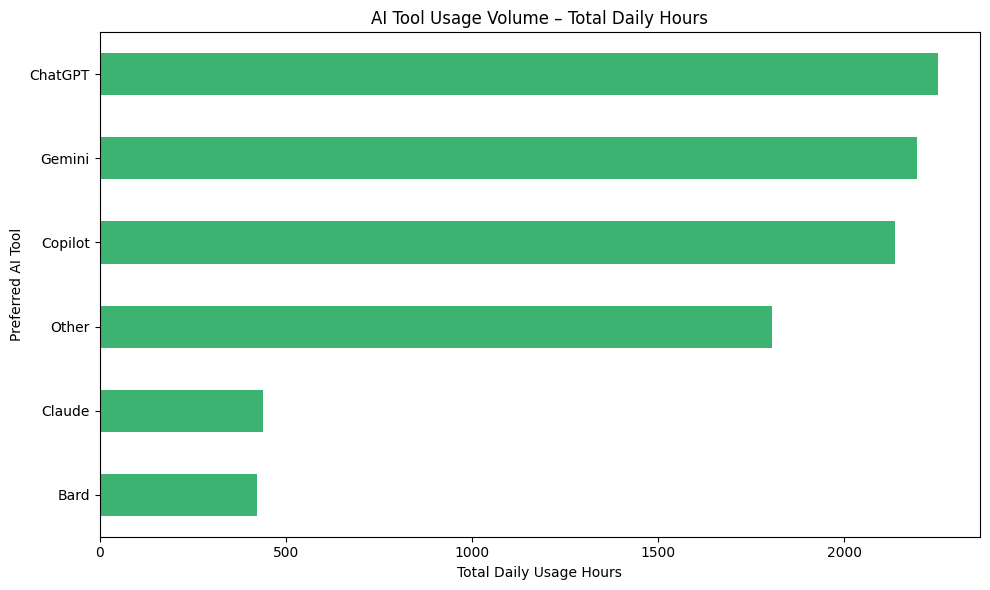

In [7]:
# Drop 'Total' row and column for plotting
usage_plot = usage_pivot.drop(index='Total').drop(columns='Total')

# Plot total usage per AI Tool (aggregated across devices)
usage_totals = usage_plot.sum(axis=1).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
usage_totals.plot(kind='barh', color='mediumseagreen')
plt.title('AI Tool Usage Volume – Total Daily Hours')
plt.xlabel('Total Daily Usage Hours')
plt.ylabel('Preferred AI Tool')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


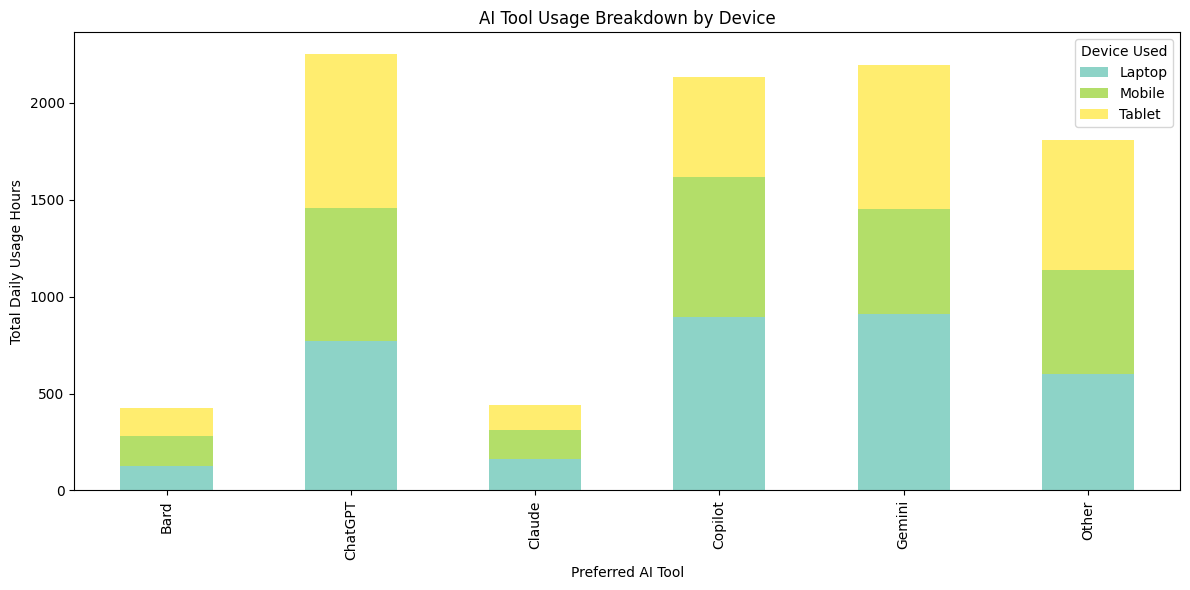

In [8]:
# Plot stacked usage across devices
usage_plot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')

plt.title('AI Tool Usage Breakdown by Device')
plt.xlabel('Preferred AI Tool')
plt.ylabel('Total Daily Usage Hours')
plt.legend(title='Device Used')
plt.tight_layout()
plt.show()


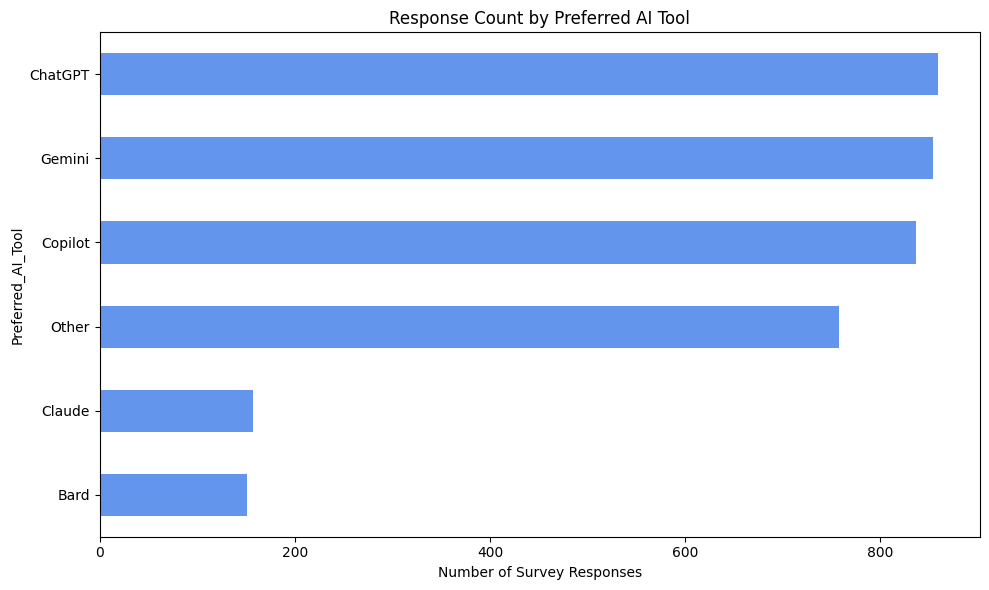

In [9]:
# Drop 'Total' row and column
count_plot = count_pivot.drop(index='Total').drop(columns='Total')

# Plot total number of responses per tool
response_totals = count_plot.sum(axis=1).sort_values()

plt.figure(figsize=(10, 6))
response_totals.plot(kind='barh', color='cornflowerblue')
plt.title('Response Count by Preferred AI Tool')
plt.xlabel('Number of Survey Responses')
plt.tight_layout()
plt.show()


## AI Tool Usage Volumes by States

In [10]:
# Aggregate usage metrics by Preferred_AI_Tool and State
tool_state_usage = (
    survey_df
    .groupby(['Preferred_AI_Tool', 'State'])['Daily_Usage_Hours']
    .agg(['sum', 'count', 'mean'])
    .reset_index()
    .rename(columns={
        'sum': 'Total_Usage_Hours',
        'count': 'Response_Count',
        'mean': 'Avg_Hours_Per_User'
    })
)

# Create pivot table of total usage
usage_heatmap = tool_state_usage.pivot(index='Preferred_AI_Tool', columns='State', values='Total_Usage_Hours').fillna(0).round(1)
print(usage_heatmap)


State              Andaman  Andhra pradesh  Arunachal pradesh  Assam  Bihar  \
Preferred_AI_Tool                                                             
Bard                   0.0            23.6                1.2   22.5   13.1   
ChatGPT                0.0            42.9               19.3   24.5   66.7   
Claude                 4.1            10.2                2.9   21.7   14.1   
Copilot                1.5            30.2               39.5   46.4   44.2   
Gemini                 5.0            44.8               18.3   48.2   30.6   
Other                  3.1            60.3               18.4   49.4   34.1   

State              Chandigarh  Chhattisgarh  Dadra  Delhi ncr   Goa  ...  \
Preferred_AI_Tool                                                    ...   
Bard                      4.6          27.9    0.0       24.5   8.0  ...   
ChatGPT                  40.6          36.7    0.0       37.6  12.7  ...   
Claude                    5.9          34.2    0.0       21.0  

## Heatmaps for AI Tools Usage per State

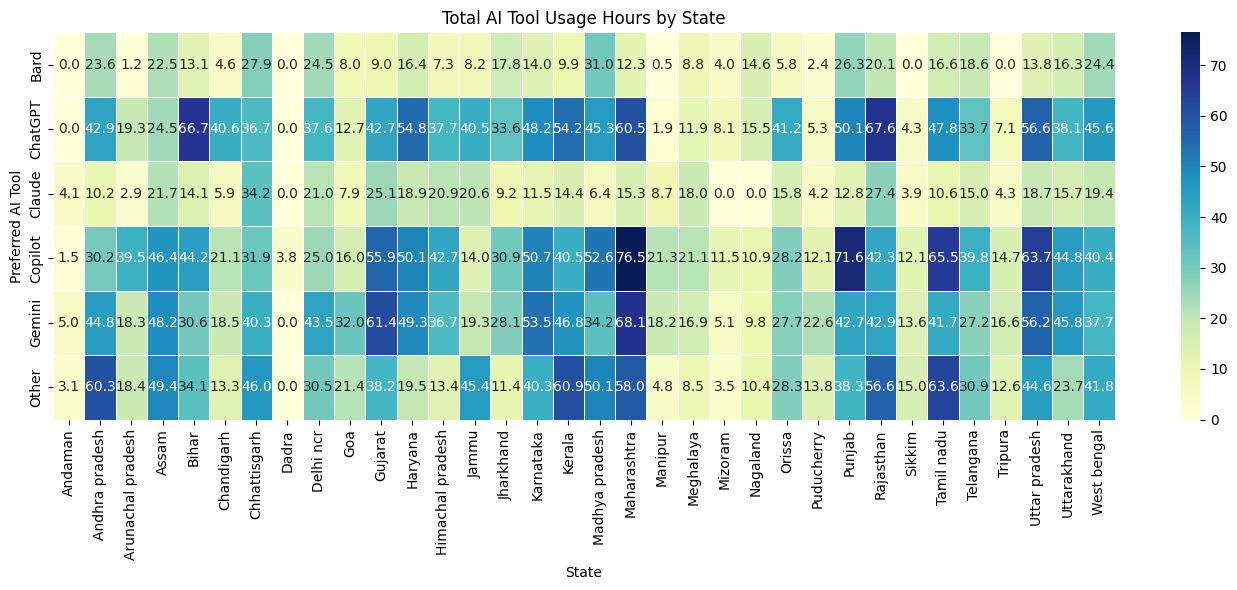

In [11]:
plt.figure(figsize=(14, 6))
sns.heatmap(usage_heatmap, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title("Total AI Tool Usage Hours by State")
plt.xlabel("State")
plt.ylabel("Preferred AI Tool")
plt.tight_layout()
plt.show()

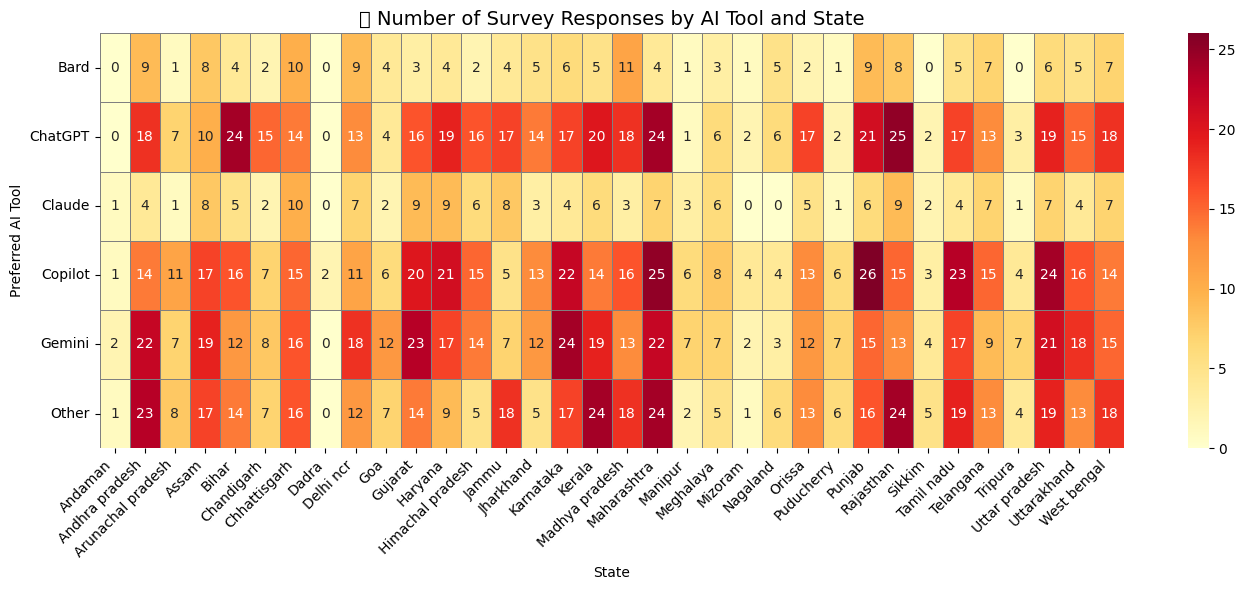

In [12]:
# Create count matrix: number of records per Tool–State pair
tool_state_counts = (
    survey_df
    .groupby(['Preferred_AI_Tool', 'State'])
    .size()
    .reset_index(name='Response_Count')
)

# Pivot for heatmap
count_matrix = tool_state_counts.pivot(index='Preferred_AI_Tool', columns='State', values='Response_Count').fillna(0).astype(int)

plt.figure(figsize=(14, 6))
sns.heatmap(count_matrix, annot=True, fmt="d", cmap="YlOrRd", linewidths=0.5, linecolor='gray')

plt.title("🔢 Number of Survey Responses by AI Tool and State", fontsize=14)
plt.xlabel("State")
plt.ylabel("Preferred AI Tool")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


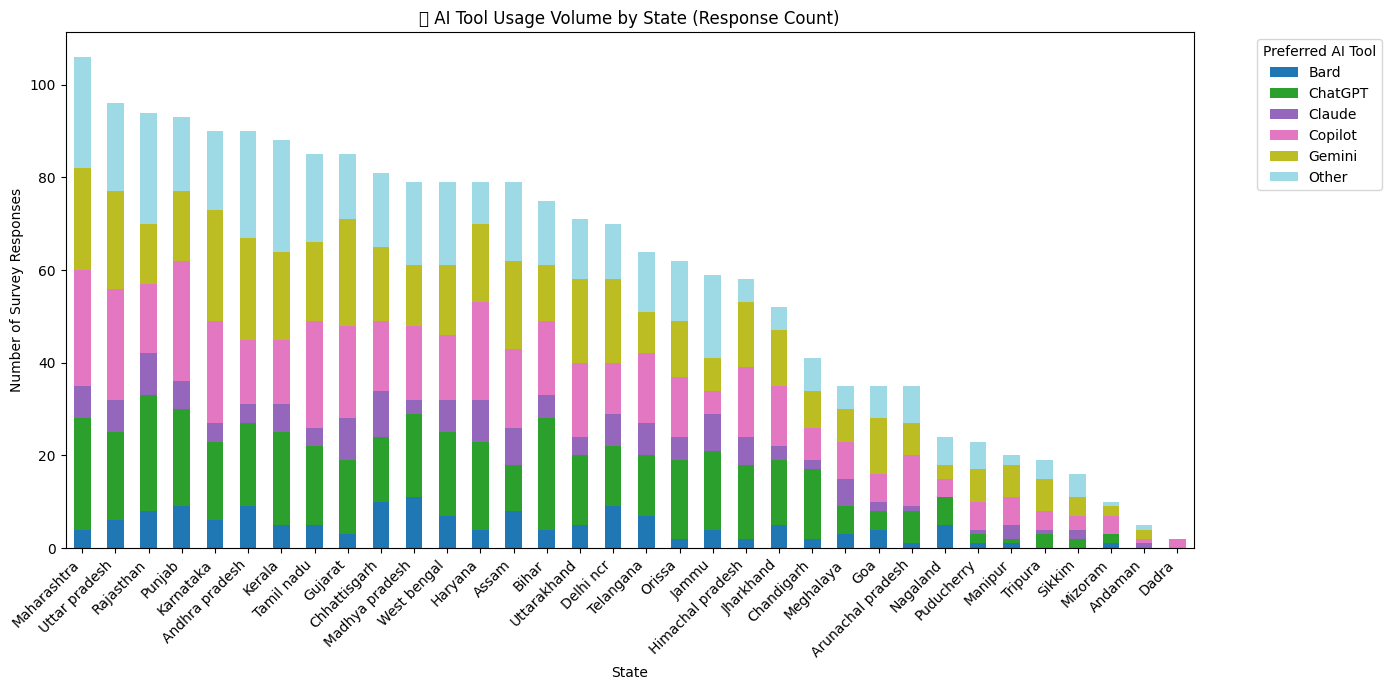

In [13]:
# Group and count number of responses per AI tool per state
tool_state_counts = (
    survey_df
    .groupby(['State', 'Preferred_AI_Tool'])
    .size()
    .reset_index(name='Response_Count')
)

# Pivot the table so States are rows and Tools are columns
stacked_data = tool_state_counts.pivot(index='State', columns='Preferred_AI_Tool', values='Response_Count').fillna(0)

# Sort by total responses (optional)
stacked_data = stacked_data.loc[stacked_data.sum(axis=1).sort_values(ascending=False).index]

# Plot the stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')

plt.title("🧠 AI Tool Usage Volume by State (Response Count)")
plt.xlabel("State")
plt.ylabel("Number of Survey Responses")
plt.legend(title="Preferred AI Tool", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## User Trust Toward AI Tools

In [14]:
# Count number of records per Year_of_Study and Trust_in_AI_Tools
year_trust_counts = (
    survey_df
    .groupby(['Year_of_Study', 'Trust_in_AI_Tools'])
    .size()
    .reset_index(name='Response_Count')
)

# Pivot to wide format for display
year_trust_table = year_trust_counts.pivot(
    index='Year_of_Study',
    columns='Trust_in_AI_Tools',
    values='Response_Count'
).fillna(0).astype(int)

# Optional: add total per Year
year_trust_table['Total'] = year_trust_table.sum(axis=1)

# Display the table
print("📋 Response Counts by Year of Study vs. Trust_in_AI_Tools")
print(year_trust_table)


📋 Response Counts by Year of Study vs. Trust_in_AI_Tools
Trust_in_AI_Tools    1    2    3    4    5  Total
Year_of_Study                                    
1                  214  156  181  150  201    902
2                  191  186  165  194  230    966
3                  135  212  190  158  186    881
4                  174  196  149  166  180    865


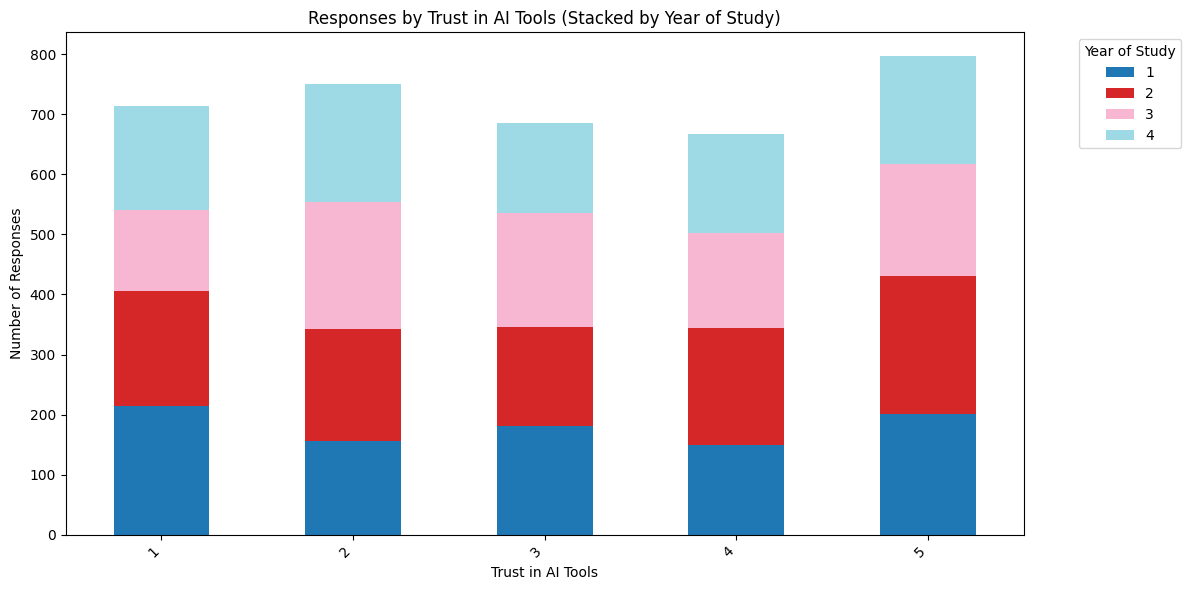

In [15]:
# Transpose the original pivot so that Trust values are on the X-axis
plot_data = year_trust_table.drop(columns='Total', errors='ignore').T  # transpose

# Plot stacked bars with Trust categories on X-axis
plot_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

plt.title("Responses by Trust in AI Tools (Stacked by Year of Study)")
plt.xlabel("Trust in AI Tools")
plt.ylabel("Number of Responses")
plt.legend(title="Year of Study", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



## Awareness Level vs Tools Used

In [16]:
# Count number of records per Awareness_Level and AI_Tools_Used
awareness_tool_counts = (
    survey_df
    .groupby(['Awareness_Level', 'AI_Tools_Used'])
    .size()
    .reset_index(name='Response_Count')
)

# Pivot for comparison table
awareness_tool_table = awareness_tool_counts.pivot(
    index='Awareness_Level',
    columns='AI_Tools_Used',
    values='Response_Count'
).fillna(0).astype(int)

# Optional: add row totals
awareness_tool_table['Total'] = awareness_tool_table.sum(axis=1)

# Display the table
print("📋 Awareness Level vs. AI Tools Used")
print(awareness_tool_table)


📋 Awareness Level vs. AI Tools Used
AI_Tools_Used    Bard  ChatGPT  ChatGPT, Copilot  ChatGPT, Gemini, Copilot  \
Awareness_Level                                                              
1                   8       63                36                        43   
2                  23       32                79                        30   
3                  17       57                39                        29   
4                  17       41                35                        31   
5                  10       50                36                        18   
6                  16       60                40                        44   
7                  17       57                65                        68   
8                  14       85                47                        64   
9                  15       78                78                        56   
10                 14      103                50                        43   

AI_Tools_Used    Claude  Co

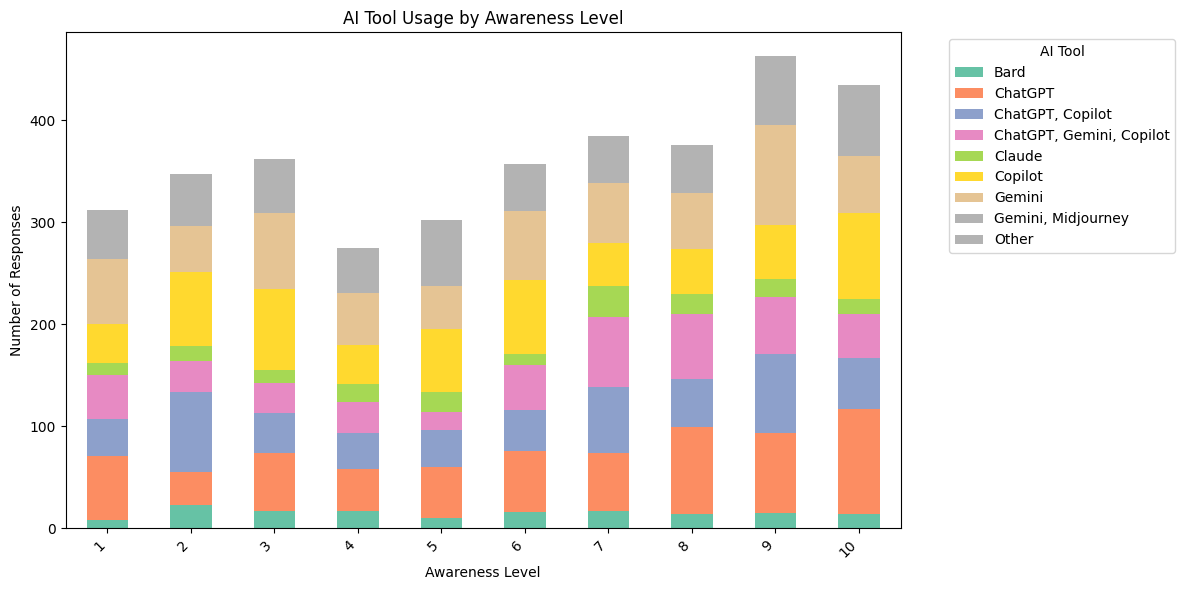

In [17]:
# Drop the Total column for plotting (if it exists)
plot_data = awareness_tool_table.drop(columns='Total', errors='ignore')

# Plot
plot_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

plt.title("AI Tool Usage by Awareness Level")
plt.xlabel("Awareness Level")
plt.ylabel("Number of Responses")
plt.legend(title="AI Tool", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


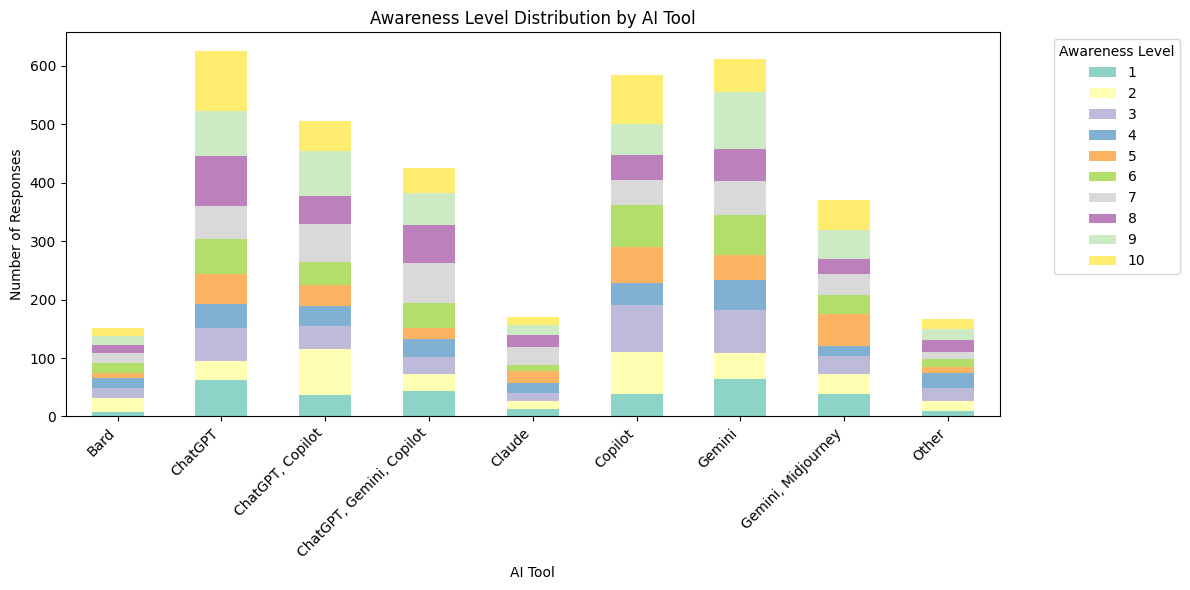

In [18]:
# Transpose the awareness-tool table to flip axes
plot_data_tool_x = awareness_tool_table.drop(columns='Total', errors='ignore').T  # Tools as index now

# Plot
plot_data_tool_x.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')

plt.title("Awareness Level Distribution by AI Tool")
plt.xlabel("AI Tool")
plt.ylabel("Number of Responses")
plt.legend(title="Awareness Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**If you find this notebook helpful, feel free to fork it and give it an upvote!**